### Introduction to the case study:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Objective:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis,skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge
import os
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\pc\Downloads\Advanced regression assignment - april\train.csv"
df = pd.read_csv(path)

In [3]:
df.shape
# the data frame has 81 columns and 1460 rows

(1460, 81)

In [4]:
df.info()
# the data frame has float64(3), int64(35), object(43)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### EDA

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
missing_values = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=True)
missing_values.tail(25)
# we identify the rows having missing values by using tail function, as it is in ascending order

ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
MSSubClass       0.000000
YearRemodAdd     0.000000
Utilities        0.000000
Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtFinType2     2.602740
BsmtExposure     2.602740
GarageQual       5.547945
GarageFinish     5.547945
GarageYrBlt      5.547945
GarageType       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

In [7]:
# we make a decission to drop more than 45% missing values, i.e. FireplaceQu, Fence, Alley, MiscFeature and PoolQC
df.drop(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'],axis =1, inplace=True)
df.shape

(1460, 76)

In [8]:
# lets check for nan 
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
# get the count of unique values in each column
value_counts = df.apply(pd.Series.value_counts)

# get the number of rows in the dataframe
n_rows = len(df)

# identify columns with missing values
missing_cols = value_counts.columns[value_counts.sum() < n_rows]

# calculate the difference in count for each missing column
for col in missing_cols:
    actual_count = value_counts[col].sum()
    expected_count = n_rows
    diff = expected_count - actual_count
    print(f"Column '{col}' has {diff} missing value(s)")

Column 'LotFrontage' has 259.0 missing value(s)
Column 'MasVnrType' has 8.0 missing value(s)
Column 'MasVnrArea' has 8.0 missing value(s)
Column 'BsmtQual' has 37.0 missing value(s)
Column 'BsmtCond' has 37.0 missing value(s)
Column 'BsmtExposure' has 38.0 missing value(s)
Column 'BsmtFinType1' has 37.0 missing value(s)
Column 'BsmtFinType2' has 38.0 missing value(s)
Column 'Electrical' has 1.0 missing value(s)
Column 'GarageType' has 81.0 missing value(s)
Column 'GarageYrBlt' has 81.0 missing value(s)
Column 'GarageFinish' has 81.0 missing value(s)
Column 'GarageQual' has 81.0 missing value(s)
Column 'GarageCond' has 81.0 missing value(s)


In [12]:
# check for na values in numeical values
# GarageYrBlt has 1379 entries (81 missing)
# MasVnrArea has 1452 entries (8 missing)
# LotFrontage has 1201 entries (259 missing)
# lets replace the empty values with the median

In [13]:
df['LotFrontage'] = df.LotFrontage.fillna(df.LotFrontage.median())
df['MasVnrArea'] = df.MasVnrArea.fillna(df.MasVnrArea.median())
df['GarageYrBlt'] = df.GarageYrBlt.fillna(df.GarageYrBlt.median())

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [15]:
(df.describe(include='all'))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1460.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,1379,1460.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.117123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,1978.589041,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,180.731373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,23.997022,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.0

In [16]:
# get the count of unique values in each column
value_counts = df.apply(pd.Series.value_counts)

# get the number of rows in the dataframe
n_rows = len(df)

# identify columns with missing values
missing_cols = value_counts.columns[value_counts.sum() < n_rows]

# print the list of missing columns
print("Columns with missing values: ", missing_cols)

Columns with missing values:  Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')


<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

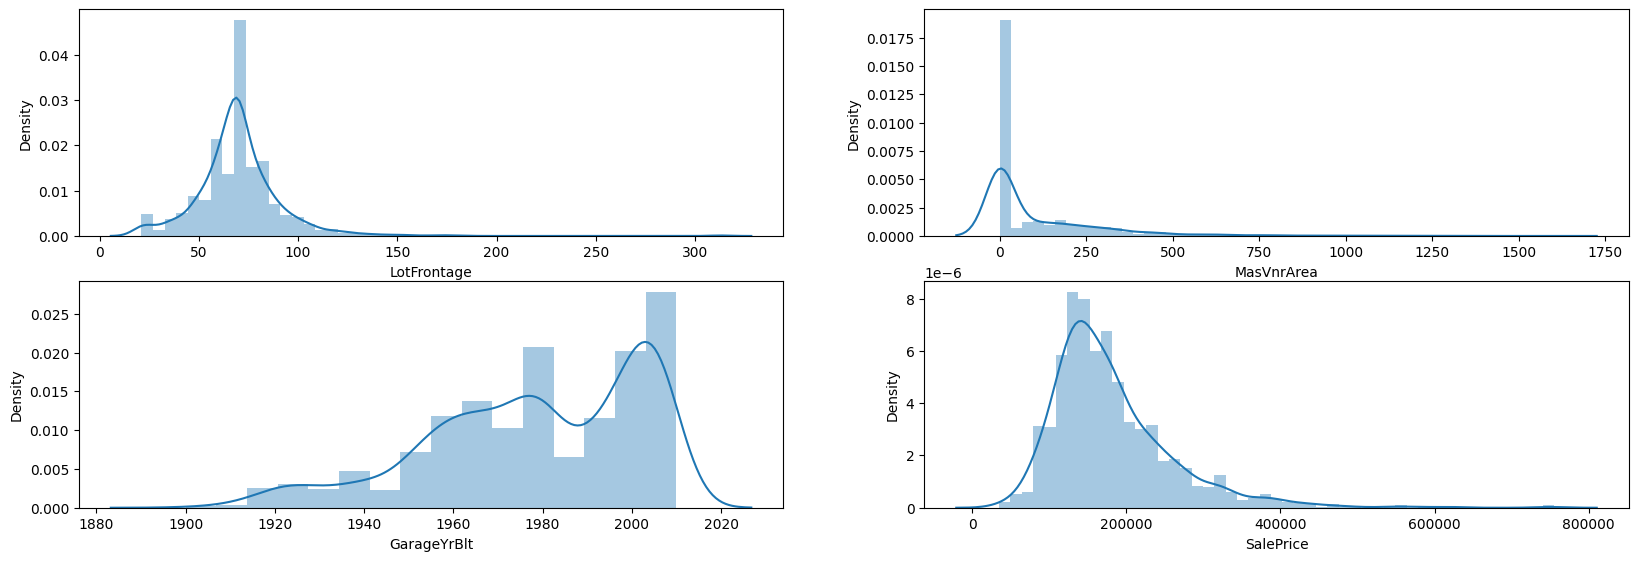

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(3,2,1)
sns.distplot(df['LotFrontage'])
plt.subplot(3,2,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(3,2,3)
sns.distplot(df['GarageYrBlt'])
plt.subplot(3,2,4)
sns.distplot(df['SalePrice'])
# these are the numerical (int 64) varaibles avaiable for distlpot

we see the skewness in the data, hence need to be treated by transforming the data to normal distribution.

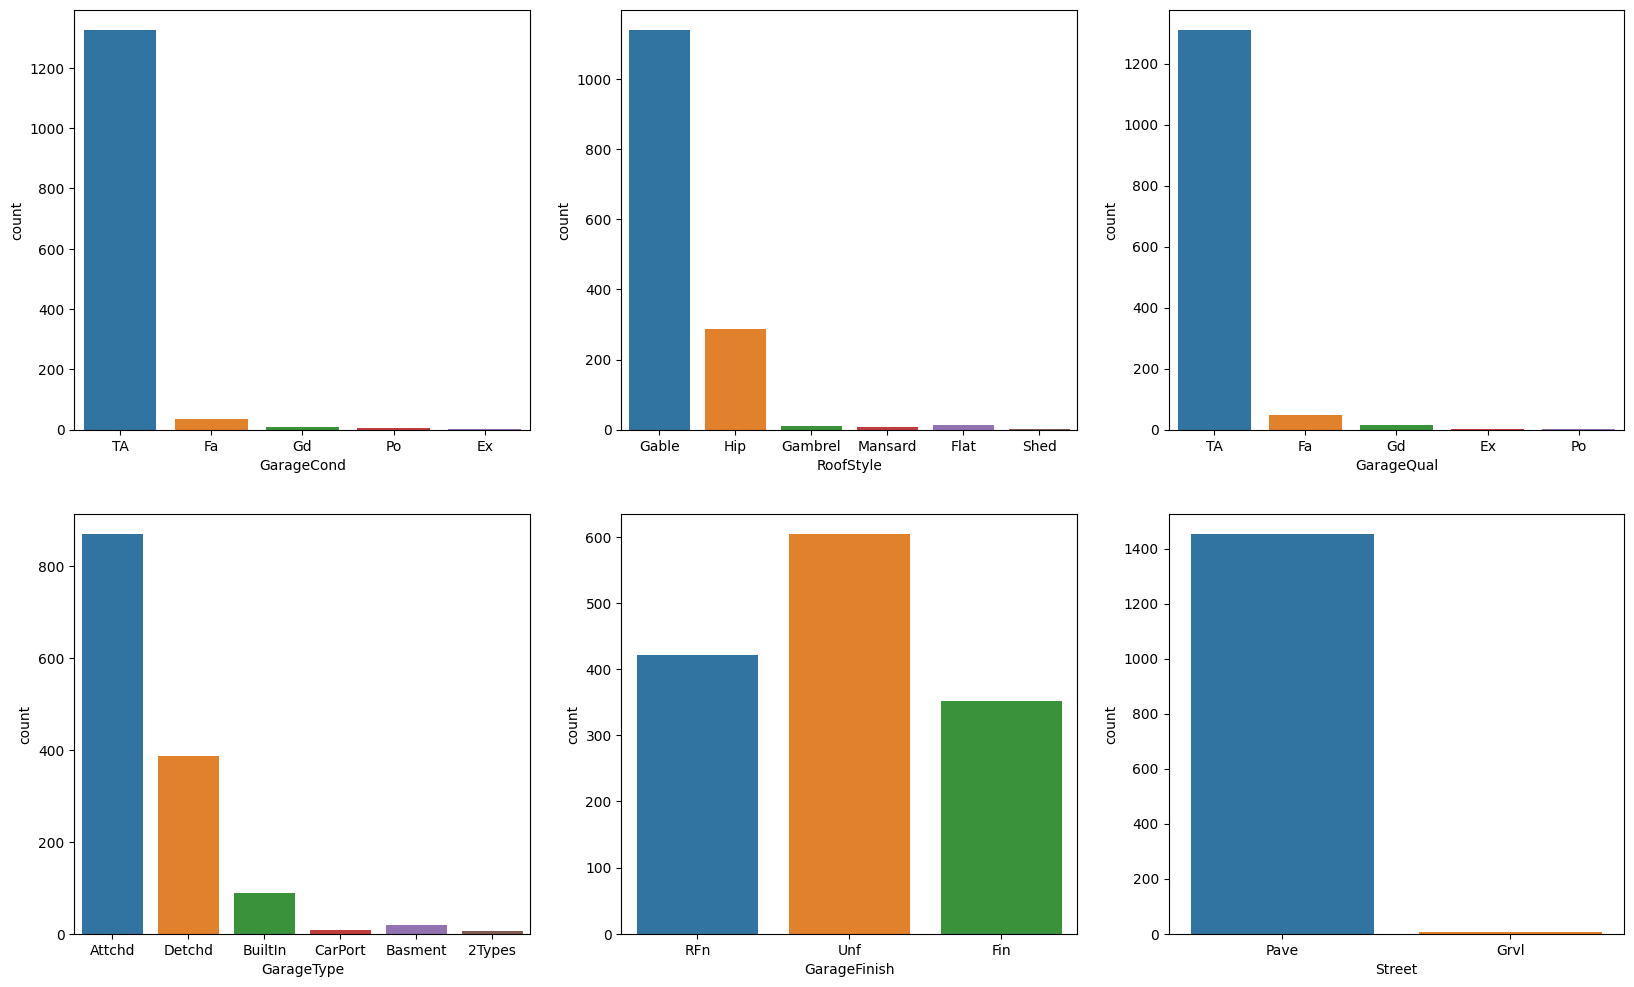

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'Street', data = df)
plt.show()

<AxesSubplot: xlabel='BsmtQual', ylabel='count'>

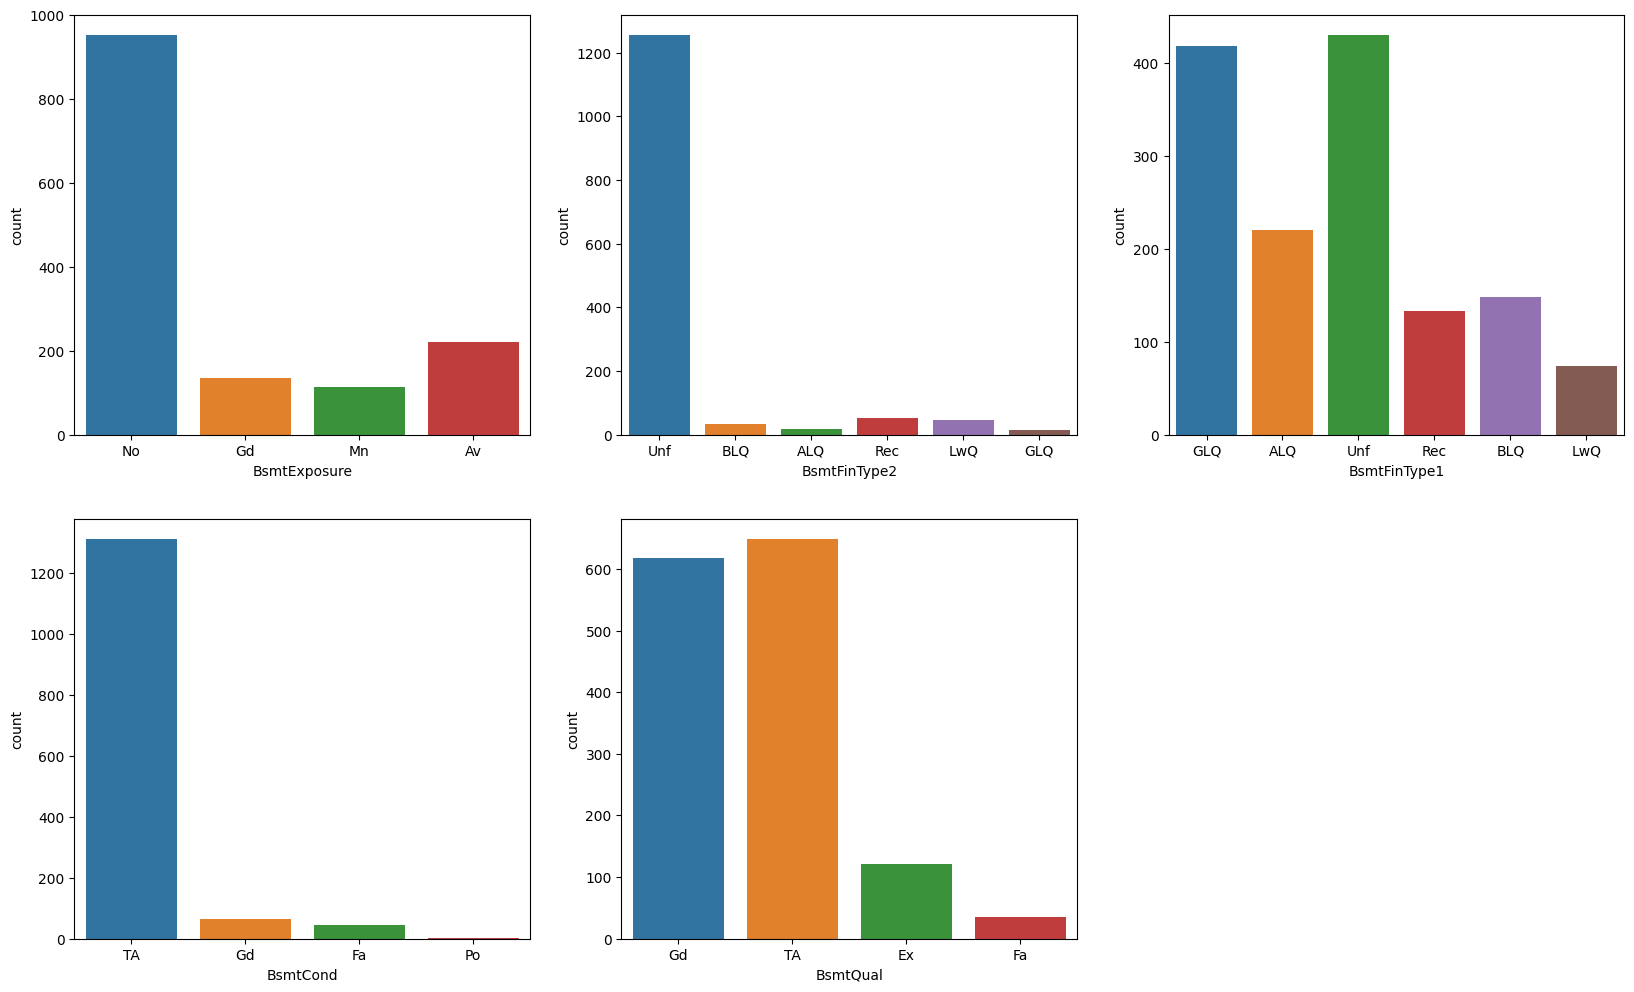

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = df)


In [20]:
# we are yet to replace nan for the object type data, so an examples is shown for better understanding
# example: Lets look at the column "GarageType" 
df['GarageType'].value_counts()
# Below: We notice that the total entries are 1379, but we have 1460 entries, i.e. 81 entries are nan

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
# So, lets assume those 81 properties do not have garage. Therefore
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

Now we have all 1460 entries

In [22]:
# lets repeat the same process for the following varaibles too
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr')  
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')

In [23]:
#Lets see the column MSSubClass which has numerical value with a significant representation. 
# Example: 20 represents "1-STORY 1946 & NEWER ALL STYLES" and so on.
# lets replace these numbers with the relevant terminologies
df['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [24]:
# Lets change the numerical to categorical variable, so as to form the dummies
# we will now be applying these changes to "MSSubClass", "OverallQual", "OverallCond"
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
                                            30:'1-STORY 1945 & OLDER',
                                            40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                            45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                            50:'1-1/2 STORY FINISHED ALL AGES',
                                            60:'2-STORY 1946 & NEWER',
                                            70:'2-STORY 1945 & OLDER',
                                            75:'2-1/2 STORY ALL AGES',
                                            80:'SPLIT OR MULTI-LEVEL',
                                            85:'SPLIT FOYER',
                                            90:'DUPLEX - ALL STYLES AND AGES',
                                           120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                           150:'1-1/2 STORY PUD - ALL AGES',
                                           160:'2-STORY PUD - 1946 & NEWER',
                                           180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                           190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
df['OverallQual'] = df['OverallQual'].replace({10:'Very Excellent',
                                                9:'Excellent',
                                                8:'Very Good',
                                                7:'Good',
                                                6:'Above Average',
                                                5:'Average',
                                                4:'Below Average',
                                                3:'Fair',
                                                2:'Poor',
                                                1:'Very Poor'})
df['OverallCond'] = df['OverallCond'].replace({10:'Very Excellent',
                                                9:'Excellent',
                                                8:'Very Good',
                                                7:'Good',
                                                6:'Above Average',
                                                5:'Average',
                                                4:'Below Average',
                                                3:'Fair',
                                                2:'Poor',
                                                1:'Very Poor'})

In [25]:
# Let us see whether the changes have happened
df['OverallCond'].value_counts()
# chanes are now reflecting

Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

In [26]:
# Let us now check for any missing values again, 
missing_val = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending=True) 
missing_val.tail(10)

Foundation     0.0
ExterQual      0.0
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
RoofStyle      0.0
ExterCond      0.0
SalePrice      0.0
dtype: float64

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

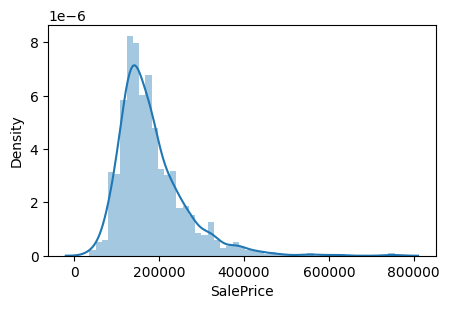

In [27]:
plt.figure(figsize=(5,3))
sns.distplot(df['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

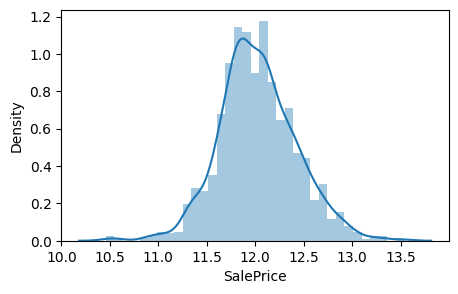

In [28]:
# Lets also check by log transformation
df['SalePrice'] = np.log(df.SalePrice)
plt.figure(figsize=(5,3))
sns.distplot(df['SalePrice'])

The distribution seems better after log transformation

In [29]:
Cat = df.select_dtypes(include=['object'])
Cat.info()
# we now see all the 41 object columns under Cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  RoofStyle      1460 non-null   object
 16  RoofMatl       1460 non-null   object
 17  Exterior1st    1460 non-null   object
 18  Exterior2nd    1460 non-null

In [30]:
df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2-STORY 1946 & NEWER'),
  Text(1, 0, '1-STORY 1946 & NEWER ALL STYLES'),
  Text(2, 0, '2-STORY 1945 & OLDER'),
  Text(3, 0, '1-1/2 STORY FINISHED ALL AGES'),
  Text(4, 0, '2 FAMILY CONVERSION - ALL STYLES AND AGES'),
  Text(5, 0, '1-1/2 STORY - UNFINISHED ALL AGES'),
  Text(6, 0, 'DUPLEX - ALL STYLES AND AGES'),
  Text(7, 0, '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'),
  Text(8, 0, '1-STORY 1945 & OLDER'),
  Text(9, 0, 'SPLIT FOYER'),
  Text(10, 0, 'SPLIT OR MULTI-LEVEL'),
  Text(11, 0, '2-STORY PUD - 1946 & NEWER'),
  Text(12, 0, '2-1/2 STORY ALL AGES'),
  Text(13, 0, 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'),
  Text(14, 0, '1-STORY W/FINISHED ATTIC ALL AGES')])

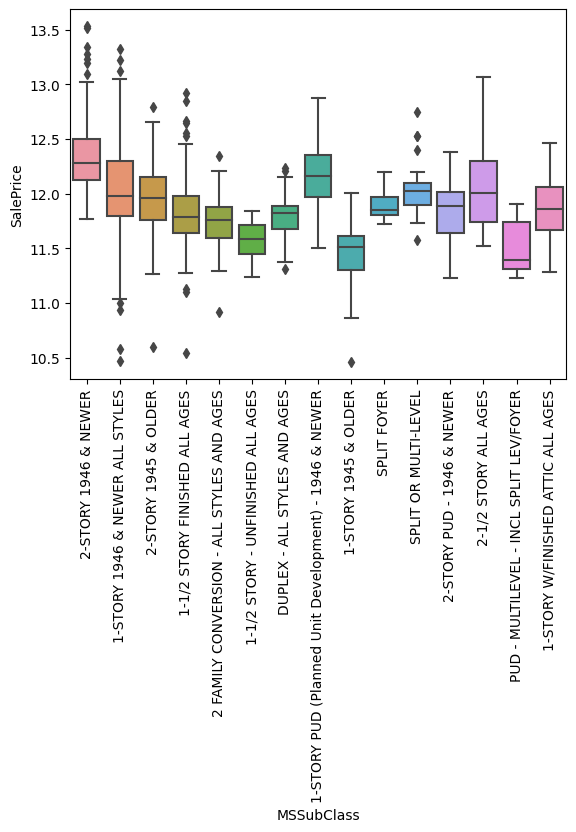

In [31]:
sns.boxplot(x='MSSubClass', y="SalePrice", data = df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2-STORY 1946 & NEWER'),
  Text(1, 0, '1-STORY 1946 & NEWER ALL STYLES'),
  Text(2, 0, '2-STORY 1945 & OLDER'),
  Text(3, 0, '1-1/2 STORY FINISHED ALL AGES'),
  Text(4, 0, '2 FAMILY CONVERSION - ALL STYLES AND AGES'),
  Text(5, 0, '1-1/2 STORY - UNFINISHED ALL AGES'),
  Text(6, 0, 'DUPLEX - ALL STYLES AND AGES'),
  Text(7, 0, '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'),
  Text(8, 0, '1-STORY 1945 & OLDER'),
  Text(9, 0, 'SPLIT FOYER'),
  Text(10, 0, 'SPLIT OR MULTI-LEVEL'),
  Text(11, 0, '2-STORY PUD - 1946 & NEWER'),
  Text(12, 0, '2-1/2 STORY ALL AGES'),
  Text(13, 0, 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'),
  Text(14, 0, '1-STORY W/FINISHED ATTIC ALL AGES')])

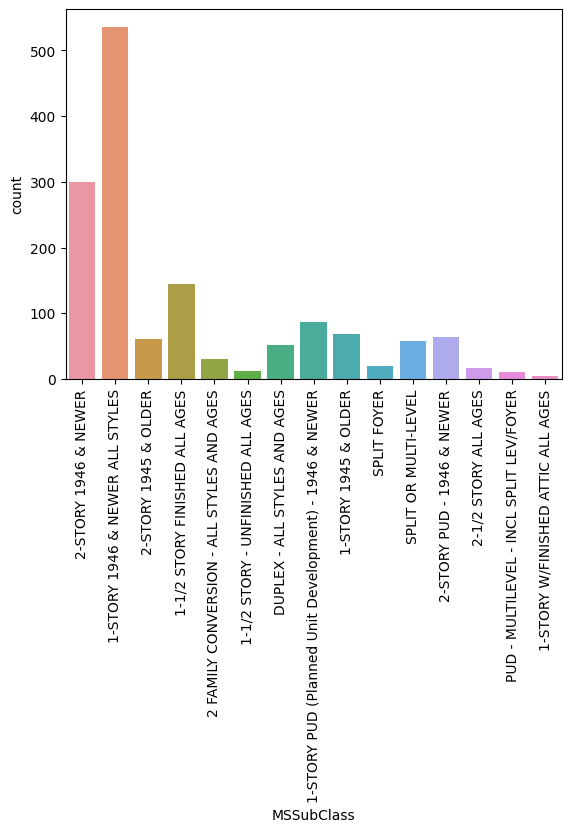

In [32]:
sns.countplot(x='MSSubClass', data = df)
plt.xticks(rotation=90)

In [33]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [34]:
df['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [35]:
df['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [36]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [37]:
# Lets drop these columns, as they are highly skewed
df.drop(['SaleType','GarageCond','GarageQual','Functional'], axis=1, inplace=True)

In [38]:
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [39]:
# Lets rename the lease counts types as 'others'
df['GarageType'] = df['GarageType'].replace(['2Types','CarPort','Basment'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
df['Foundation'] = df['Foundation'].replace(['Slab','Stone','Wood'],'Others')

<AxesSubplot: xlabel='GarageFinish', ylabel='SalePrice'>

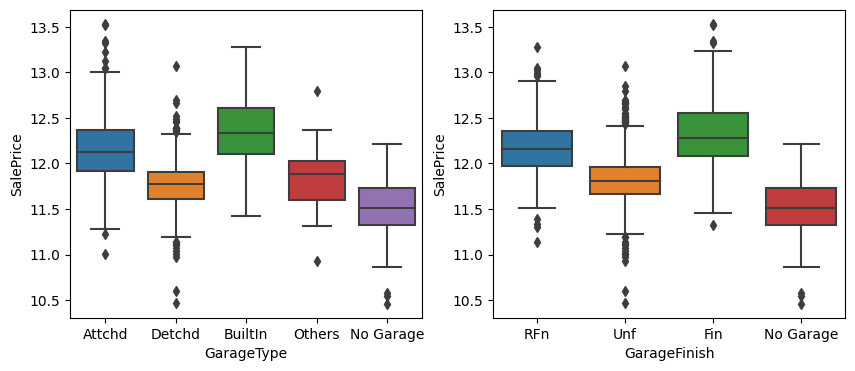

In [40]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data =df)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [41]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [42]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Others      91
CmentBd     60
Wd Shng     38
Brk Cmn      7
Name: Exterior2nd, dtype: int64

In [43]:
df['CentralAir'].value_counts() 
# This is highly skewed, hence we need to drop this

Y    1365
N      95
Name: CentralAir, dtype: int64

In [44]:
df['Heating'].value_counts()
# This is highly skewed, hence we need to drop this

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [45]:
df['ExterCond'].value_counts()
# This is highly skewed, hence we need to drop this

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [46]:
df['RoofMatl'].value_counts()
# This is highly skewed, hence we need to drop this

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [47]:
# now lets drop the above three varialbes
df.drop(['Heating','ExterCond','CentralAir','RoofMatl'], axis=1, inplace=True)

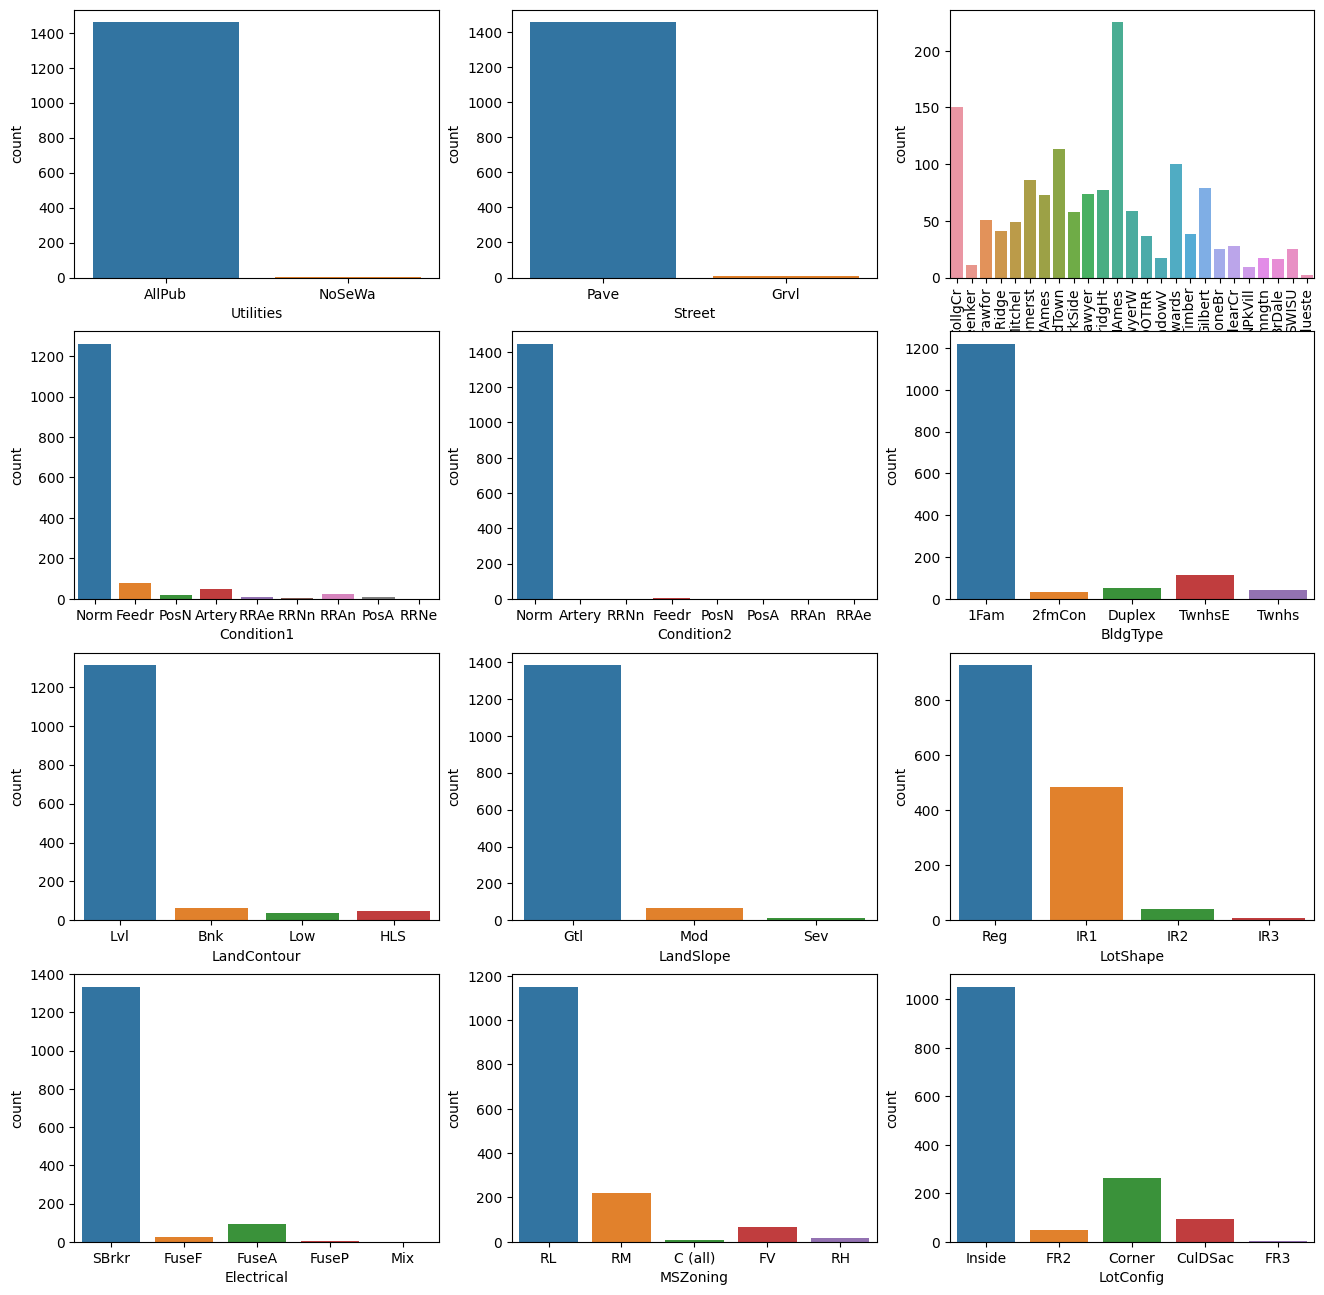

In [51]:
plt.figure(figsize=(16, 16))
plt.subplot(4,3,1)
sns.countplot(x = 'Utilities',  data = df)
plt.subplot(4,3,2)
sns.countplot(x = 'Street', data = df)
plt.subplot(4,3,3)
sns.countplot(x = 'Neighborhood', data = df)
plt.xticks(rotation=90)
plt.subplot(4,3,4)
sns.countplot(x = 'Condition1', data = df)
plt.subplot(4,3,5)
sns.countplot(x = 'Condition2',  data = df)
plt.subplot(4,3,6)
sns.countplot(x = 'BldgType', data = df)
plt.subplot(4,3,7)
sns.countplot(x = 'LandContour',  data = df)
plt.subplot(4,3,8)
sns.countplot(x = 'LandSlope', data = df)
plt.subplot(4,3,9)
sns.countplot(x = 'LotShape', data = df)
plt.subplot(4,3,10)
sns.countplot(x = 'Electrical', data = df)
plt.subplot(4,3,11)
sns.countplot(x = 'MSZoning',  data = df)
plt.subplot(4,3,12)
sns.countplot(x = 'LotConfig', data = df)
plt.show()

In [52]:
# From the above image we could say that few variables are highly skewed, so lets drop them
df.drop(['Utilities','Street','Condition1','Condition2','LandSlope','LandContour','Electrical'],axis=1,inplace=True)

In [54]:
# from the variable 'MSZoning', lets group C (all) and RH togehter and call it as 'Others'
df['MSZoning'] = df['MSZoning'].replace(['RH','C(all)'],'Others')

In [56]:
# Lets check for the remaining columns
df['LotConfig'].value_counts()
# this column is higly skewed and  needs to be dropped 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [57]:
df['BsmtCond'].value_counts()
# this column is higly skewed and  needs to be dropped 

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [58]:
df['BsmtFinType2'].value_counts()
# this column is higly skewed and  needs to be dropped 

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [59]:
df['PavedDrive'].value_counts()
# this column is higly skewed and  needs to be dropped 

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [60]:
# lets drop the columns
df.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

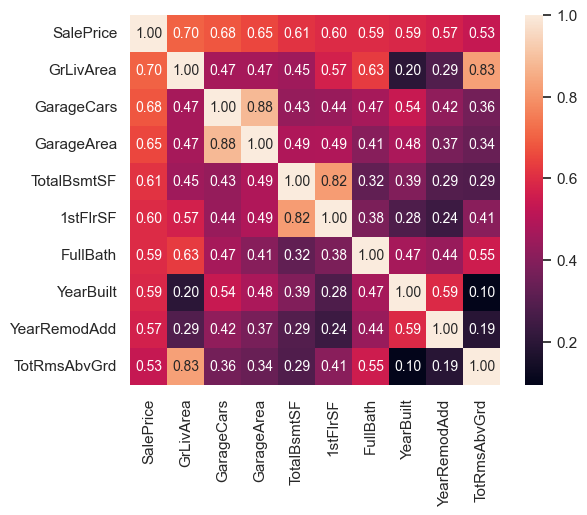

In [64]:
#saleprice correlation matrix
corrmat = df.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index #  k = 10  number of variables for heatmap
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [66]:
# from the data, lets add one new column called as 'YearSinceRemodel' 
df['YearSinceRemodel'] = 2023 - ((df['YearRemodAdd'] - df['YearBuilt']) + df['YearBuilt']) #feature engineering

In [67]:
Cat1 = df.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables

In [68]:
Num = df.select_dtypes(include=['int64','float64']) #all numerical variables

In [69]:
Cat1.columns,Num.columns

(Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
        'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
        'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
        'GarageType', 'GarageFinish', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
        'YearSinceRemodel'],
       dtype='object'))

In [70]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 131)


In [71]:
df = pd.concat([df, Cat1], axis=1) 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,Normal,12.247694,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,MetalSd,Met

In [72]:
df.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','OverallCond','MSSubClass','OverallQual','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [76]:
df.shape

(1460, 163)

In [77]:
df.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,20,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,47,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,21,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,

### Split the data into train and test data set

In [79]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [81]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

In [82]:
X_train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,211,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.935650,-0.925422,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,4,73,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
318,319,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,1.556976,0.623522,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,4,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

### Ridge

In [86]:
# list of alphas to tune
params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106034,0.037576,0.002778,0.000511,0.00006,{'alpha': 6e-05},0.871495,0.777066,0.847955,0.893849,0.906851,0.859443,0.045814,1,0.926653,0.937675,0.932820,0.922776,0.919371,0.927859,0.006638
1,0.073182,0.025927,0.008570,0.002823,0.0006,{'alpha': 0.0006},0.884698,0.723953,0.833648,0.895537,0.908743,0.849316,0.067648,2,0.910907,0.924017,0.918351,0.908048,0.903284,0.912921,0.007393
2,0.052577,0.033865,0.005316,0.003709,0.0008,{'alpha': 0.0008},0.883983,0.709929,0.830856,0.892926,0.905429,0.844625,0.071989,3,0.905600,0.919960,0.913294,0.903247,0.896736,0.907767,0.008075
3,0.021204,0.004189,0.002958,0.000572,0.001,{'alpha': 0.001},0.882925,0.699710,0.826255,0.890441,0.902914,0.840449,0.075119,4,0.900384,0.916454,0.908573,0.898350,0.891850,0.903122,0.008542
4,0.019660,0.008489,0.002905,0.000587,0.002,{'alpha': 0.002},0.877051,0.653832,0.806218,0.882275,0.885196,0.820914,0.088522,5,0.881117,0.901736,0.888550,0.880289,0.871688,0.884676,0.010066
5,0.013071,0.002669,0.003044,0.000171,0.004,{'alpha': 0.004},0.858264,0.579570,0.775038,0.855413,0.848276,0.783312,0.106410,6,0.846917,0.868897,0.860422,0.844710,0.835848,0.851359,0.011783
6,0.011849,0.000934,0.002612,0.000446,0.006,{'alpha': 0.006},0.839755,0.541112,0.759717,0.839245,0.839555,0.763877,0.115591,7,0.818933,0.849314,0.840093,0.821811,0.818917,0.829814,0.012547
7,0.009795,0.001056,0.002788,0.000437,0.008,{'alpha': 0.008},0.826368,0.519312,0.747930,0.829650,0.838830,0.752418,0.121045,8,0.804024,0.840043,0.824084,0.808458,0.806223,0.816566,0.013695


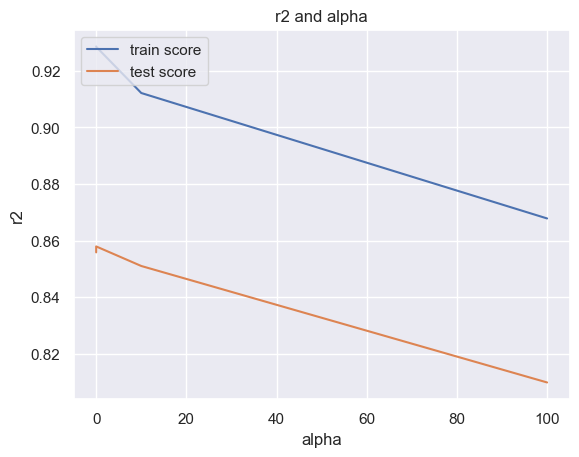

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [89]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.99022785e-06, -4.78957195e-04,  1.56803585e-06,  4.09644648e-06,
        3.58541645e-06,  1.32283605e-05,  1.78516416e-05,  3.46654122e-05,
        8.04685741e-05,  1.07922956e-04, -7.84003597e-05,  1.09991173e-04,
        4.31004544e-02,  1.57190329e-02,  5.15531636e-02,  3.79750926e-02,
        8.84965764e-03, -8.41302706e-02,  8.27611749e-03,  3.98932373e-02,
        5.49267406e-02,  3.08443891e-05,  9.87242596e-05, -5.88780570e-05,
        1.15794960e-04,  1.92174040e-04,  2.28847435e-04, -4.03205370e-04,
       -3.41919891e-06,  3.88940559e-04, -1.56896046e-03,  1.27427145e-02,
       -8.46996687e-02,  4.81744024e-02,  4.32673452e-03,  4.54337242e-04,
       -1.29502265e-02,  2.73166402e-02,  2.51587374e-02,  2.10210220e-04,
       -4.10984500e-02,  1.52129310e-02, -2.69696524e-02,  2.34318835e-02,
        8.37972236e-03,  7.14592428e-02,  4.54959344e-02,  6.77233444e-02,
        1.96229209e-02,  2.07215319e-02, -4.82991425e-02,  7.50389499e-03,
        3.76325420e-02, -

In [90]:
ridge.score(X_train,y_train)

0.9095270917583002

In [91]:
ridge.score(X_test,y_test)

0.8743718851695935

The score is slighly intact with each other amongst the train and test data

In [92]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.507),
 ('Id', -0.145),
 ('LotFrontage', -0.09),
 ('LotArea', -0.085),
 ('MasVnrArea', -0.084),
 ('BsmtFinSF1', -0.082),
 ('BsmtFinSF2', -0.082),
 ('BsmtUnfSF', -0.071),
 ('TotalBsmtSF', -0.068),
 ('1stFlrSF', -0.066),
 ('2ndFlrSF', -0.061),
 ('LowQualFinSF', -0.06),
 ('GrLivArea', -0.059),
 ('BsmtFullBath', -0.056),
 ('BsmtHalfBath', -0.055),
 ('FullBath', -0.053),
 ('HalfBath', -0.052),
 ('BedroomAbvGr', -0.052),
 ('KitchenAbvGr', -0.051),
 ('TotRmsAbvGrd', -0.051),
 ('Fireplaces', -0.05),
 ('GarageCars', -0.05),
 ('GarageArea', -0.05),
 ('WoodDeckSF', -0.048),
 ('OpenPorchSF', -0.047),
 ('EnclosedPorch', -0.047),
 ('3SsnPorch', -0.045),
 ('ScreenPorch', -0.042),
 ('PoolArea', -0.041),
 ('MiscVal', -0.033),
 ('MoSold', -0.032),
 ('YearSinceRemodel', -0.032),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.031),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.031),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.029),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 

### This section is done to answer the subjective question number 1

In [105]:
# doubling the value of alpha
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.81591862e-06, -4.63957237e-04,  1.56066653e-06,  1.53322292e-05,
        1.05273534e-05,  1.77351417e-05,  1.80614278e-05,  4.63239189e-05,
        8.56338805e-05,  1.12834129e-04, -9.06179597e-05,  1.07850052e-04,
        4.00246411e-02,  1.25245386e-02,  4.59793612e-02,  3.46789242e-02,
        8.40832610e-03, -6.79995809e-02,  8.57469242e-03,  4.40944773e-02,
        5.31470110e-02,  5.67984076e-05,  1.04378120e-04, -6.00420407e-05,
        9.76237431e-05,  1.93868745e-04,  2.37633836e-04, -4.66765849e-04,
       -4.25363028e-06,  4.95311795e-04, -1.86206173e-03,  1.12148671e-02,
       -7.22151482e-02,  4.82747745e-02,  6.82022648e-03,  2.58705130e-03,
       -1.69086404e-02,  1.81775449e-02,  2.57901872e-02, -3.70257481e-04,
       -3.52400865e-02,  5.92900929e-03, -1.89802489e-02,  1.39467371e-02,
        7.17812078e-03,  5.21611957e-02,  2.16742823e-02,  5.14237389e-02,
       -4.84977412e-03,  1.64879613e-02, -3.88167128e-02,  4.46219764e-03,
        3.43515769e-02, -

In [106]:
ridge.score(X_train,y_train)

0.9010783285320959

In [107]:
ridge.score(X_test,y_test)

0.8668067633094285

In [108]:
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.486),
 ('Id', -0.103),
 ('LotFrontage', -0.082),
 ('LotArea', -0.072),
 ('MasVnrArea', -0.068),
 ('BsmtFinSF1', -0.063),
 ('BsmtFinSF2', -0.056),
 ('BsmtUnfSF', -0.055),
 ('TotalBsmtSF', -0.053),
 ('1stFlrSF', -0.049),
 ('2ndFlrSF', -0.048),
 ('LowQualFinSF', -0.047),
 ('GrLivArea', -0.047),
 ('BsmtFullBath', -0.045),
 ('BsmtHalfBath', -0.043),
 ('FullBath', -0.041),
 ('HalfBath', -0.04),
 ('BedroomAbvGr', -0.04),
 ('KitchenAbvGr', -0.04),
 ('TotRmsAbvGrd', -0.039),
 ('Fireplaces', -0.038),
 ('GarageCars', -0.038),
 ('GarageArea', -0.037),
 ('WoodDeckSF', -0.037),
 ('OpenPorchSF', -0.037),
 ('EnclosedPorch', -0.036),
 ('3SsnPorch', -0.036),
 ('ScreenPorch', -0.035),
 ('PoolArea', -0.032),
 ('MiscVal', -0.03),
 ('MoSold', -0.029),
 ('YearSinceRemodel', -0.027),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.024),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.024),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.024),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) -

#### What happens when we double the value of alpha?

Ans: 
* In the above Lasso condidtion, the value of alpha is now increased from 10 to 20.

* We now see the score value changing from 0.9095 to 0.9010 for train data and from 0.8743 to 0.8668 for test data

* The model is shrinking as and when the alpha value is increased

Note: Detailed explanation is provided in subjective question section.

### Lasso

In [94]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.106034,0.037576,0.002778,0.000511,0.00006,{'alpha': 6e-05},0.871495,0.777066,0.847955,0.893849,0.906851,0.859443,0.045814,1,0.926653,0.937675,0.932820,0.922776,0.919371,0.927859,0.006638
1,0.073182,0.025927,0.008570,0.002823,0.0006,{'alpha': 0.0006},0.884698,0.723953,0.833648,0.895537,0.908743,0.849316,0.067648,2,0.910907,0.924017,0.918351,0.908048,0.903284,0.912921,0.007393
2,0.052577,0.033865,0.005316,0.003709,0.0008,{'alpha': 0.0008},0.883983,0.709929,0.830856,0.892926,0.905429,0.844625,0.071989,3,0.905600,0.919960,0.913294,0.903247,0.896736,0.907767,0.008075
3,0.021204,0.004189,0.002958,0.000572,0.001,{'alpha': 0.001},0.882925,0.699710,0.826255,0.890441,0.902914,0.840449,0.075119,4,0.900384,0.916454,0.908573,0.898350,0.891850,0.903122,0.008542
4,0.019660,0.008489,0.002905,0.000587,0.002,{'alpha': 0.002},0.877051,0.653832,0.806218,0.882275,0.885196,0.820914,0.088522,5,0.881117,0.901736,0.888550,0.880289,0.871688,0.884676,0.010066


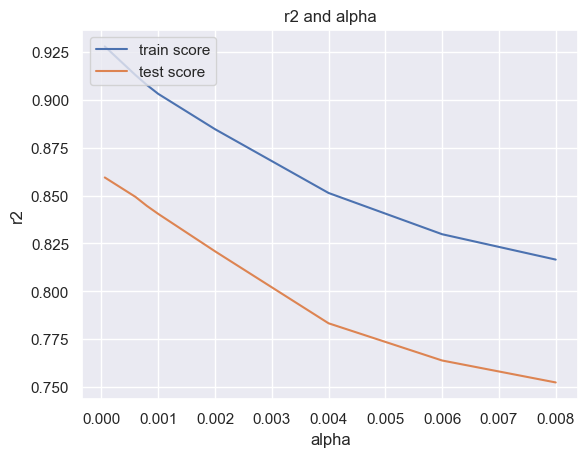

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#lasso.coef_

Lasso(alpha=0.001)

In [98]:
lasso.score(X_train,y_train)

0.8978286168896208

In [99]:
lasso.score(X_test,y_test)

0.86419780482171

In [100]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.471),
 ('Id', -0.215),
 ('LotFrontage', -0.103),
 ('LotArea', -0.1),
 ('MasVnrArea', -0.085),
 ('BsmtFinSF1', -0.083),
 ('BsmtFinSF2', -0.06),
 ('BsmtUnfSF', -0.058),
 ('TotalBsmtSF', -0.055),
 ('1stFlrSF', -0.051),
 ('2ndFlrSF', -0.046),
 ('LowQualFinSF', -0.04),
 ('GrLivArea', -0.04),
 ('BsmtFullBath', -0.039),
 ('BsmtHalfBath', -0.037),
 ('FullBath', -0.036),
 ('HalfBath', -0.034),
 ('BedroomAbvGr', -0.033),
 ('KitchenAbvGr', -0.029),
 ('TotRmsAbvGrd', -0.024),
 ('Fireplaces', -0.021),
 ('GarageCars', -0.021),
 ('GarageArea', -0.019),
 ('WoodDeckSF', -0.018),
 ('OpenPorchSF', -0.017),
 ('EnclosedPorch', -0.017),
 ('3SsnPorch', -0.017),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.015),
 ('MiscVal', -0.012),
 ('MoSold', -0.011),
 ('YearSinceRemodel', -0.011),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.008),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.008),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.003),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 

### Question 1: This section is done to answer the subjective question number 1
### Question 2: What happens when we double the value of alpha?

In [110]:
#doubling the alpha value

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#lasso.coef_

Lasso(alpha=0.002)

In [111]:
lasso.score(X_train,y_train)

0.8803786040495174

In [112]:
lasso.score(X_test,y_test)

0.849310473979538

In [113]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.431),
 ('Id', -0.135),
 ('LotFrontage', -0.098),
 ('LotArea', -0.086),
 ('MasVnrArea', -0.079),
 ('BsmtFinSF1', -0.048),
 ('BsmtFinSF2', -0.042),
 ('BsmtUnfSF', -0.039),
 ('TotalBsmtSF', -0.029),
 ('1stFlrSF', -0.025),
 ('2ndFlrSF', -0.025),
 ('LowQualFinSF', -0.021),
 ('GrLivArea', -0.017),
 ('BsmtFullBath', -0.016),
 ('BsmtHalfBath', -0.016),
 ('FullBath', -0.015),
 ('HalfBath', -0.015),
 ('BedroomAbvGr', -0.014),
 ('KitchenAbvGr', -0.012),
 ('TotRmsAbvGrd', -0.012),
 ('Fireplaces', -0.008),
 ('GarageCars', -0.007),
 ('GarageArea', -0.007),
 ('WoodDeckSF', -0.003),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', -0.0),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('YearSinceRemodel', 0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.0),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.0),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.0)

#### Ans 1: 
* In the above Lasso regression condidtion, the value of alpha is now increased from 0.001 to 0.002

* We now see the score value changing from 0.8978 to 0.8803 for train data and from 0.8641 to 0.8493 for test data

* The model is shrinking as and when the alpha value is increased

Note: Detailed explanation is provided in subjective question section.

### Question 3: Identtify the next five important predictor varialbe after dropping the previously identifyied predictor variable. 

In [114]:
X_new = df.drop(['SalePrice','SaleCondition_Partial','SaleCondition_Others','SaleCondition_Normal','GarageFinish_Unf','GarageFinish_RFn'], axis=1)
y_new = df['SalePrice']

In [116]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new,train_size=0.7,test_size = 0.3, random_state=100)

In [117]:
scaler = StandardScaler()

X_new_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_new_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

In [118]:
X_new_train.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage
210,211,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,-0.935650,-0.925422,-2.366798,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,4,73,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
318,319,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,1.556976,0.623522,1.645101,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,4,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,

In [119]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new,train_size=0.7,test_size = 0.3, random_state=100)

#### Lasso regression to identify the new influencing varialbes

In [120]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_new_train, y_new_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [122]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.340921,0.186485,0.008406,0.004972,0.00006,{'alpha': 6e-05},0.869701,0.779522,0.845679,0.890626,0.909568,0.859019,0.045091,1,0.925416,0.935475,0.931671,0.921847,0.917131,0.926308,0.006599
1,0.034618,0.017825,0.003437,0.001147,0.0006,{'alpha': 0.0006},0.882821,0.725804,0.830926,0.892292,0.910583,0.848485,0.066803,2,0.909818,0.921162,0.917047,0.907008,0.900929,0.911193,0.007189
2,0.025984,0.005309,0.003020,0.000106,0.0008,{'alpha': 0.0008},0.882868,0.712156,0.828223,0.889842,0.906747,0.843967,0.070966,3,0.904762,0.917246,0.912256,0.902370,0.894618,0.906250,0.007868
3,0.022990,0.007194,0.003571,0.001190,0.001,{'alpha': 0.001},0.881849,0.701945,0.824093,0.887555,0.903763,0.839841,0.074014,4,0.899394,0.913844,0.907621,0.897558,0.889978,0.901679,0.008276
4,0.012425,0.001083,0.002566,0.000486,0.002,{'alpha': 0.002},0.877003,0.653857,0.805662,0.881106,0.886120,0.820749,0.088500,5,0.880874,0.898942,0.888415,0.880006,0.870665,0.883781,0.009445
5,0.012523,0.003420,0.002706,0.000377,0.004,{'alpha': 0.004},0.858290,0.578312,0.774014,0.854522,0.850084,0.783044,0.107016,6,0.846578,0.868275,0.860211,0.844588,0.835650,0.851060,0.011658
6,0.009490,0.001286,0.003242,0.000335,0.006,{'alpha': 0.006},0.839452,0.540034,0.758768,0.838249,0.841005,0.763502,0.116037,7,0.818526,0.849310,0.839963,0.821708,0.818262,0.829554,0.012723
7,0.008251,0.000663,0.002960,0.000591,0.008,{'alpha': 0.008},0.825863,0.518324,0.746997,0.828741,0.839903,0.751966,0.121409,8,0.803472,0.839975,0.823861,0.808253,0.805291,0.816170,0.013915


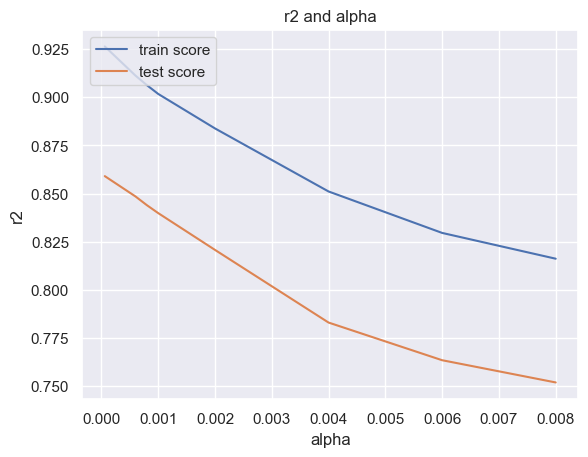

In [123]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [125]:
#optimum alpha

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_new_train, y_new_train) 
#lasso.coef_

Lasso(alpha=0.001)

In [126]:
lasso.score(X_new_train,y_new_train)

0.8964723639597247

In [127]:
lasso.score(X_new_test,y_new_test)

0.8612606956556051

In [128]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.508),
 ('Id', -0.222),
 ('LotFrontage', -0.108),
 ('LotArea', -0.102),
 ('MasVnrArea', -0.085),
 ('BsmtFinSF1', -0.082),
 ('BsmtFinSF2', -0.063),
 ('BsmtUnfSF', -0.06),
 ('TotalBsmtSF', -0.057),
 ('1stFlrSF', -0.054),
 ('2ndFlrSF', -0.051),
 ('LowQualFinSF', -0.046),
 ('GrLivArea', -0.044),
 ('BsmtFullBath', -0.041),
 ('BsmtHalfBath', -0.041),
 ('FullBath', -0.038),
 ('HalfBath', -0.035),
 ('BedroomAbvGr', -0.034),
 ('KitchenAbvGr', -0.027),
 ('TotRmsAbvGrd', -0.025),
 ('Fireplaces', -0.024),
 ('GarageCars', -0.024),
 ('GarageArea', -0.02),
 ('WoodDeckSF', -0.02),
 ('OpenPorchSF', -0.019),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.016),
 ('ScreenPorch', -0.016),
 ('PoolArea', -0.014),
 ('MiscVal', -0.012),
 ('MoSold', -0.011),
 ('YearSinceRemodel', -0.01),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.003),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.002),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.002),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) -

#### Answer 3:
* The next influencing varaible after droppping the previously identied varialbes are: 
     * ('GarageType_BuiltIn', 0.084),
     * ('GarageType_Detchd', 0.084),
     * ('GarageType_No Garage', 0.093),
     * ('GarageType_Others', 0.119),
     * ('GarageFinish_No Garage', 0.192)

### Conclusion:
We have seen an implementation of ridge and lasso regression models and the theoretical and mathematical concepts behind these techniques. Some of the key takeaways from this case study include:



### Ridge
* No much variance noticed between the train and test data (refer: Figure "r2 and alpha" in section "Ridge")

* Ridge score for train and test data are 0.9095 and 0.8743

* The scores are prety much in the acceptable range.

* Top five significant variables in Ridge are:
     * 'GarageFinish_RFn': 0.082,
     * 'GarageFinish_Unf': 0.094,
     * 'SaleCondition_Normal': 0.098,
     * 'SaleCondition_Others':0.106,
     * 'SaleCondition_Partial': 0.143    
     
* The optimum value of 'Lambda' in ridge is = 10

### Lasso

* No much variance noticed between the train and test data (refer: Figure "r2 and alpha" in section "Lasso")

* Lasso score for train and test data are 0.8798 and 0.8641

* The scores are accpetable as they are close to each other

* Top five significant variables in Lasso are:
    * GarageFinish_RFn': 0.08
    * GarageFinish_Unf': 0.082
    * SaleCondition_Normal': 0.099
    * SaleCondition_Others': 0.121
    * SaleCondition_Partial': 0.197

* The optimum value of 'Lambda in Lasso is = 0.001
* Lasso Regression could be opted because its helps in feature selection.